---
##**FINAL PROJECT 3 (KELOMPOK 6)**
---

>Nama Anggota :
- Rachma Lingga Maulidya    (PYTN-KS13-024)
- Reza Pramudya Bagaskara   (PYTN-KS13-010)
- Syahrindra Dzaky Ramadhan (PYTN-KS13-014)

---
#**Perkenalan**
---

##**Latar Belakang**
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD. Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17.9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas. Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model pembelajaran mesin dapat sangat membantu.

##**Dataset**

Dataset "heart_failure_clinical_records_dataset.csv" merupakan kumpulan data yang berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

>Dataset yang digunakan pada analisis ini yaitu Heart Failure Prediction. Dataset yang diunduh dari kaggle melalui link berikut _[rideshare_kaggle](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)_


##**Atribut Information**

Adapun atribut pada data yang digunakan adalah sebagai berikut:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

##**Project Objective**
Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:
- Mampu memahami konsep Classification dengan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

---
##**Import Library**
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

---
##**Data Loading**
---

In [ ]:
#Melakukan loading data dengan menggunakan pandas
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Melakukan setting untuk menampilkan semua kolom pada dataframe serta menampilkan data
pd.set_option("display.max_columns", None)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset_3.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
#Melihat dimensi data
df.shape

(299, 13)

Dapat dilihat bahwa pada data yang digunakan terdapat 299 baris dan 13 kolom.

In [ ]:
#Melihat informasi (kolom, baris, tipe data) pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#Melihat banyaknya unique value
for col in df.columns:
    print(col,': ', df[col].nunique())

age :  47
anaemia :  2
creatinine_phosphokinase :  208
diabetes :  2
ejection_fraction :  17
high_blood_pressure :  2
platelets :  176
serum_creatinine :  40
serum_sodium :  27
sex :  2
smoking :  2
time :  148
DEATH_EVENT :  2


In [ ]:
#Melihat statistik deskriptif dari masing-masing atribut
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.astype('category').describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.0,299,299,299,299,299,299.00,299.0,299,299,299,299,299
unique,47.0,2,208,2,17,2,176.00,40.0,27,2,2,148,2
top,60.0,0,582,0,35,0,263358.03,1.0,136,1,0,250,0
freq,33.0,170,47,174,49,194,25.00,50.0,40,194,203,7,203


---
##**Data Cleaning**
---

In [ ]:
#Menampilkan jumlah data yang duplikat
df.duplicated().sum()

0

In [ ]:
#Menampilkan keberadaan ada atau tidaknya missing value
df.isnull().values.any()

False

Berdasarkan hasil tersebut dapat dilihat bahwa tidak terdapat data yang duplikat, dan dikarenakan _False_ maka tidak terdapat missing value pada data yang digunakan. Sehingga data dapat langsung digunakan untuk proses analisis.

---
##**Data Exporation**
---

**Data Query and Grouping**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#Mengetahui jumlah pasien berdasarkan jenis kelamin
print('Jenis Kelamin : ')
print(df['sex'].astype(int).value_counts().T)

Jenis Kelamin : 
1    194
0    105
Name: sex, dtype: int64


Berdasarkan hasil diatas, 1 menunjukkan Jenis kelamin pria dan 0 menunjukkan jenis kelamin wanita. Dapat dilihat bahwa jumlah pasien pria pada data adalah sebanyak 194 orang dan wanita sebanyak 105 orang.

In [ ]:
#Mengetahui trombosit terbesar dan terkecil
df['platelets'].agg(('min', 'max'))

min     25100.0
max    850000.0
Name: platelets, dtype: float64

Berdasarkan hasil tersebut, nilai minimal trombosit pasien pada data adalah sebesar 25100.0 dan nilai maksimalnya adalah sebesar 850000.0.

In [ ]:
#Mengetahui presentase pasien berdasarkan usia
age_counts = df['age'].value_counts()
total_pasien = len(df)
persentase = (age_counts / total_pasien) * 100
print(persentase)

60.000    11.036789
50.000     9.030100
65.000     8.695652
70.000     8.361204
45.000     6.354515
55.000     5.685619
75.000     3.678930
53.000     3.344482
58.000     3.344482
63.000     2.675585
80.000     2.341137
72.000     2.341137
40.000     2.341137
42.000     2.341137
85.000     2.006689
68.000     1.672241
52.000     1.672241
62.000     1.672241
51.000     1.337793
59.000     1.337793
61.000     1.337793
73.000     1.337793
49.000     1.337793
69.000     1.003344
46.000     1.003344
64.000     1.003344
82.000     1.003344
90.000     1.003344
78.000     0.668896
60.667     0.668896
54.000     0.668896
77.000     0.668896
57.000     0.668896
66.000     0.668896
44.000     0.668896
67.000     0.668896
95.000     0.668896
48.000     0.668896
43.000     0.334448
86.000     0.334448
81.000     0.334448
79.000     0.334448
41.000     0.334448
94.000     0.334448
87.000     0.334448
47.000     0.334448
56.000     0.334448
Name: age, dtype: float64


Melihat banyak nilai dari masing masing kolom

In [ ]:
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('\n','#'*60,'\n')

age : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64

 ############################################################ 

anaemia : 
0    170
1    129
Name: anaemia, dtype: int64

 ############################################################ 

creatinine_phosphokinase : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosp

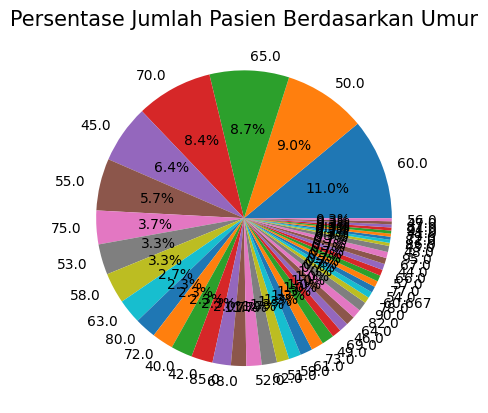

In [ ]:
#Membuat pie chart presentase pasien berdasarkan usia
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')

#Menambahkan judul
plt.title('Persentase Jumlah Pasien Berdasarkan Umur', size=15)

#Menampilkan pie chart
plt.show()

Dapat dilihat bahwa presentase terbanyak yaitu pasien berusia 60 tahun yaitu sebesar 11.0% disusul oleh pasien berusia 50 tahun yaitu sebesar 9.0%. Sedangkan presentase terendah yaitu pasien berumur 56 sebesar 0.33%.

<ipython-input-65-51c2cbc36ccd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DEATH_EVENT'])


Text(0.5, 1.0, 'Distribusi Data Kematian')

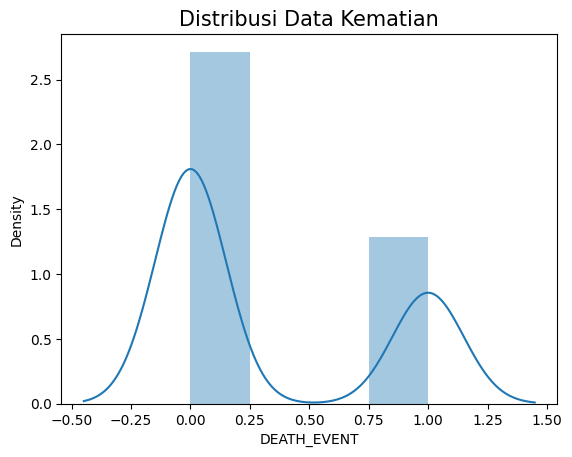

In [ ]:
#Visualisasi distribusi data pada kolom 'DEATH_EVENT'
sns.distplot(df['DEATH_EVENT'])
plt.title('Distribusi Data Kematian', size = 15)

In [ ]:
#Mengetahui rata-rata Tekanan Darah Tinggi Di Tiap Umur
df['age'] = df['age'].astype(int)
high_blood_pressure = df[['high_blood_pressure','age']].groupby(['age'], as_index = False).agg({'high_blood_pressure':'mean'})
high_blood_pressure	

,age,high_blood_pressure
0,40,0.142857
1,41,0.000000
2,42,0.000000
3,43,0.000000
4,44,1.000000
5,45,0.263158
6,46,0.666667
7,47,0.000000
8,48,0.500000
9,49,0.750000


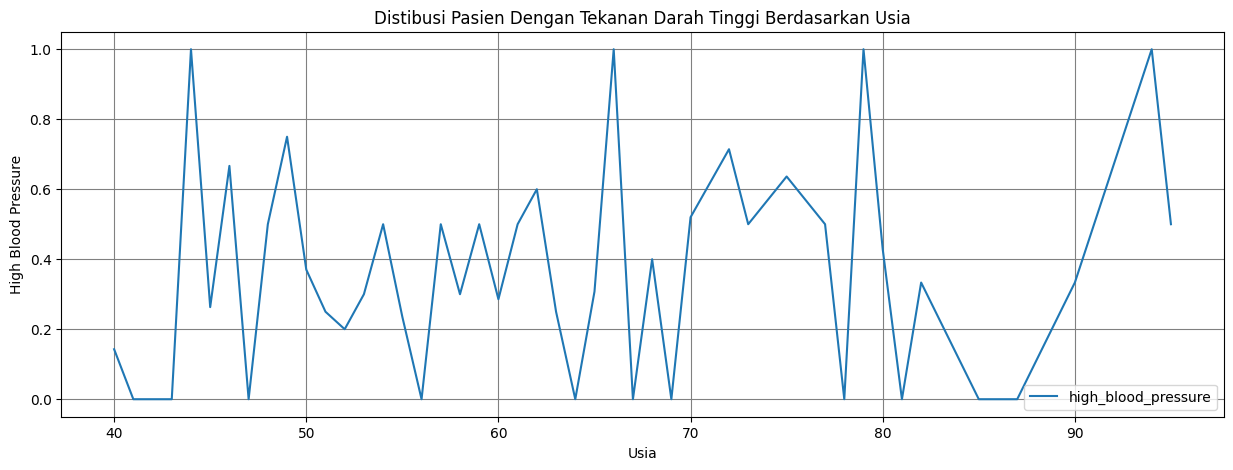

In [ ]:
#Visualisasi Tekanan Darah Tinggi Di Tiap Usia
high_blood_pressure.plot(kind='line', x='age', y='high_blood_pressure', figsize=(15,5))

plt.title('Distibusi Pasien Dengan Tekanan Darah Tinggi Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('High Blood Pressure')
plt.grid(color="grey")

plt.show()

Berdasarkan hasil tersebut dapat dilihat bahwa pasien dengan usia 44, 66, 79, dan 94 tahun memiliki riwayat tekanan darah tinggi yang terbesar yaitu dengan rata-rata 1.000000.

Text(0.5, 1.0, 'Tekanan Darah Tinggi vs Pecahan Ejeksi')

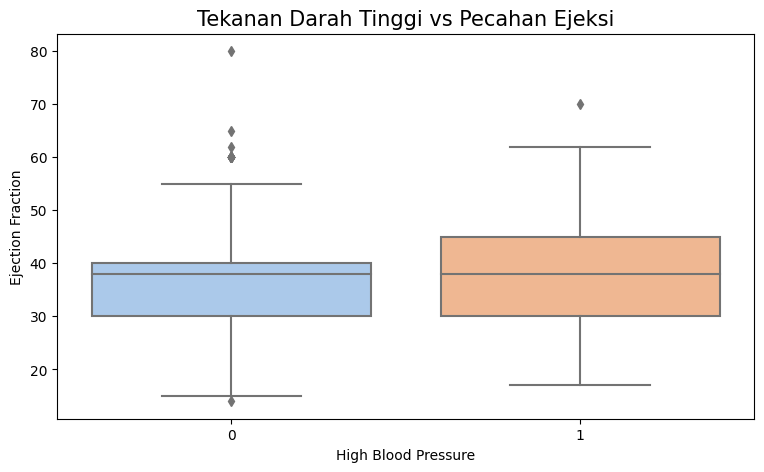

In [ ]:
#Visualisasi boxplot perbandingan Tekanan Darah Tinggi berdasarkan Pecahan Ejeksi
fig, ax = plt.subplots(figsize=(9, 5))
sns.boxplot(x = 'high_blood_pressure', y = 'ejection_fraction', data = df, palette = "pastel")
plt.xlabel("High Blood Pressure", fontsize = 10)
plt.ylabel("Ejection Fraction", fontsize = 10)
plt.title("Tekanan Darah Tinggi vs Pecahan Ejeksi", fontsize = 15)

Pada grafik Boxplot terlihat bahwa 0 yang berarti tidak memiliki riwayat tekanan darah tinggi, sedangkan 1 berati memiliki riwayat tekanan darah tinggi. Dapat dilihat bahwa 0 memiliki jangkauan yang cukup jauh terhadap 1. Outlier dari 0 juga lebih banyak daripada 1.

**Mencari Central Tendency**

In [ ]:
#Menghitung rata-rata ejection fraction berdasarkan atribut 'DEATH_EVENT' 
df_mean = df.groupby('DEATH_EVENT')['ejection_fraction'].mean().sort_values(ascending=False)
df_mean.T

DEATH_EVENT
0    40.26601
1    33.46875
Name: ejection_fraction, dtype: float64

In [ ]:
#Melihat usia pasien penyakit jantung yang paling banyak merokok
df.loc[df['smoking'] == 1, 'age'].mode()

0    60
Name: age, dtype: int64

In [ ]:
#Melihat nilai median dari atribut platelets
median = df['platelets'].median()
print(median)

262000.0


Dapat dilihat beberapa nilai statistik dasar (central tendency) dari beberapa atribut pada data. Nilai mean dari atribut ejection_fraction terhadap DEATH_EVENT adalah 40.26601 untuk 0 dan 33.46875 untuk 1. Lalu, median dari kolom platelets adalah 262000.0. Kemudian, modus dari usia pasien terhadap atribut smoking menghasilkan output '60' yang berarti pasien dengan riwayat perokok terbanyak adalah pada usia 60 tahun. Informasi ini dapat membantu kita untuk memahami distribusi data pada dataset.

**Mencari Variability**

In [ ]:
# Mencari variabilitas pada kolom 'Creatinine Phosphokinase'
variance = np.var(df['creatinine_phosphokinase'])
std_dev = np.std(df['creatinine_phosphokinase'])
z = df['creatinine_phosphokinase']
z.skew()
percentile = np.percentile(z, [25, 50, 75])
jangkauan = np.ptp(z)

print("Variansi Atribut Creatinine Phosphokinase:", variance)
print("Standar deviasi:", std_dev)
print("Skewness:", z.skew())
print("Percentile:", percentile)
print("Range:", jangkauan)

Variansi Atribut Creatinine Phosphokinase: 938309.8805829913
Standar deviasi: 968.6639668032415
Skewness: 4.463110084653752
Percentile: [116.5 250.  582. ]
Range: 7838


Dari analisa variabilitas kolom 'creatinine_phosphokinase' pada dataset, ditemukan nilai variansinya yang cukup besar sebesar 938309.8805829913 dan standar deviasi sebesar 968.6639668032415. Lalu nilai Skewness sebesar 4.463110084653752, dimana semakin mendekati nol menunjukkan distribusi data yang relatif simetris. Sehingga, distribusi data cenderung normal. Hasil persentil menunjukkan penyebaran data di 25%, 50%, dan 75% yang pada output tersebut adalah 116.5, 250, dan 582. Rentang Kreatin kinase yang dihasilkan jaringan tubuh pasien pada dataset adalah 7838, menunjukkan besar jangkauan nilai-nilai dalam data yang cukup besar.

---
##**Data Preprocessing**
---

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Mengetahui Korelasi Atribut Pada Data Terhadap 'DEATH_EVENT' dan Fiksasi Data Yang Digunakan**

In [ ]:
#Menghitung korelasi antara setiap atribut dengan kolom target 'DEATH_EVENT'
corr_matrix = df.corr()
corr_target = corr_matrix['DEATH_EVENT']

#Membuat dataframe korelasi antara semua atribut terhadap kolom 'DEATH_EVENT'
df_corr = pd.DataFrame({'attribute':corr_target.index, 'correlation':corr_target.values})
df_corr = df_corr.sort_values(by='correlation', ascending=False)

#Menampilkan dataframe korelasi antara semua atribut terhadap kolom 'DEATH_EVENT'
print(df_corr)

                   attribute  correlation
12               DEATH_EVENT     1.000000
7           serum_creatinine     0.294278
0                        age     0.253581
5        high_blood_pressure     0.079351
1                    anaemia     0.066270
2   creatinine_phosphokinase     0.062728
3                   diabetes    -0.001943
9                        sex    -0.004316
10                   smoking    -0.012623
6                  platelets    -0.049139
8               serum_sodium    -0.195204
4          ejection_fraction    -0.268603
11                      time    -0.526964


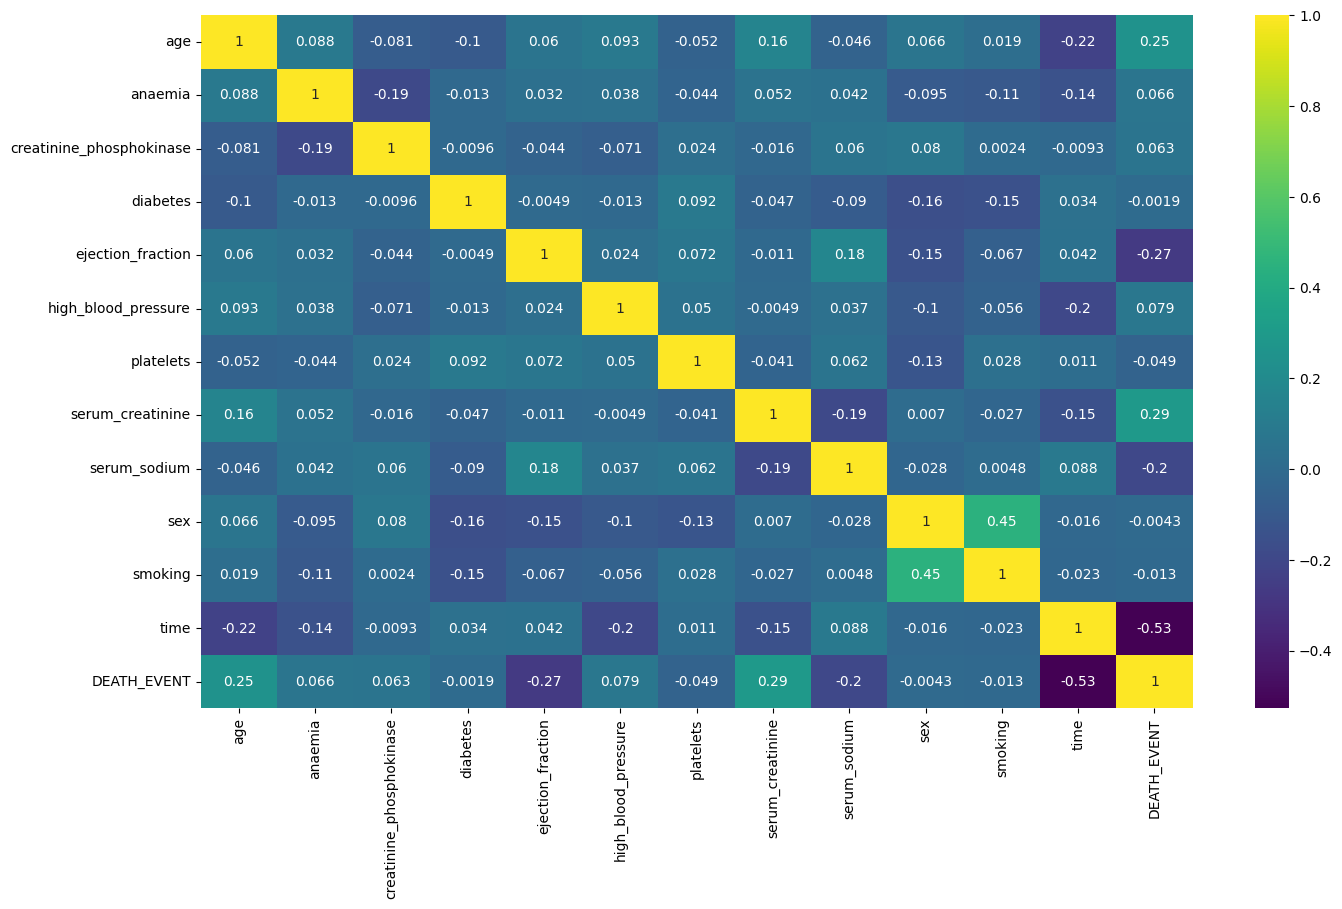

In [ ]:
#Menampilkan visualisasi korelasi antar atribut
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

**Membuat Split Data Test dan Data Train**

In [ ]:
#Melakukan inisialisasi variabel X dan y
df.rename(columns = {'DEATH_EVENT' : 'death_event'}, inplace = True)
X = df.drop(columns = 'death_event')
y = df['death_event']

print(X)
print(y)

     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0     75        0                       582         0                 20   
1     55        0                      7861         0                 38   
2     65        0                       146         0                 20   
3     50        1                       111         0                 20   
4     65        1                       160         1                 20   
..   ...      ...                       ...       ...                ...   
294   62        0                        61         1                 38   
295   55        0                      1820         0                 38   
296   45        0                      2060         1                 60   
297   45        0                      2413         0                 38   
298   50        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0          

In [ ]:
topFeatures = SelectKBest(f_regression, k=12)
fit = topFeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']

print("Top 12 Features yang Berpengaruh")
print(featureScores.nlargest(12, 'Score'))

Top 12 Features yang Berpengaruh
                    Features       Score
11                      time  114.181264
7           serum_creatinine   28.158492
4          ejection_fraction   23.094063
0                        age   20.410478
8               serum_sodium   11.765331
5        high_blood_pressure    1.881937
1                    anaemia    1.310096
2   creatinine_phosphokinase    1.173259
6                  platelets    0.718880
10                   smoking    0.047333
9                        sex    0.005534
3                   diabetes    0.001121


Dengan menggunakan F Regression fitur yang berpengaruh dalam model yaitu 'time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium', 'high_blood_pressure', 'anaemia', 'creatinine_phosphokinase'.

In [ ]:
X_fit = df[['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium', 'high_blood_pressure', 'anaemia', 'creatinine_phosphokinase']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.30, random_state=13)

In [ ]:
X_train.head()

,time,serum_creatinine,ejection_fraction,age,serum_sodium,high_blood_pressure,anaemia,creatinine_phosphokinase
17,14,0.80,14,45,127,0,0,582
157,120,1.00,25,50,136,0,0,250
92,82,1.18,60,42,137,0,0,582
142,109,0.90,30,50,132,0,0,482
218,197,1.10,35,68,134,0,1,1021


---
##**Pendefinisian Model**
---

Random Forest Classifier dan Ada Boost Classifier merupakan dua model yang berbasiskan  algoritma ensembled

In [ ]:
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

Pemilihan tiga algoritma individual (Logistic Regression, SVC, dan Decision Tree) untuk digabungkan (ensembled) menjadi satu model menggunakan Voting Classifier

In [ ]:
logit = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()

---
##**Pelatihan Model**
---

In [ ]:
rf.fit(X_train, y_train)
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
y_test_rf = rf.predict(X_test)
y_test_ada = ada.predict(X_test)

In [ ]:
vt = VotingClassifier(estimators=[('clf1', logit), ('clf2', dt), ('clf3', svm)], voting='hard')

In [ ]:
vt.fit(X_train, y_train)
y_test_vt = vt.predict(X_test)

---
##**Evaluasi Model**
---

Evaluasi ketiga model akan dilakukan dengan memanfaatkan library classification report yang akan menampilkan beberapa aspek penting seperti precision, recall, f1-score, dan accuracy. 
<br><br>
Secara definisi, precision adalah perbandingan antara True Positive (TP) dengan banyaknya data yang diprediksi positif. Sedangkan untuk Recall, secara definisi adalah perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif. Hal ini dapat diartikan menjadi semakin kecil False Positive (FP), membuat precision semakin besar. Sedangkan untuk recall, semakin kecil False Negative (FN) membuat recall semakin besar. Yang dimana False Positive (FP) dan False Negative (FN) adalah dua tipe error.
<br><br>
Kasus yang diangkat pada final project 3 ini adalah *medical testing* yang dimana model akan memprediksi apakah pasien sudah meninggal saat waktu follow-up atau belum. Terdapat dua opsi saat model melakukan prediksi, yaitu: <br>
1. Model memprediksi pasien sudah meninggal saat waktu follow-up
2. Model memprediksi pasien belum meninggal saat waktu follow-up


Berdasarkan dua opsi prediksi model yang telah dijabarkan, akan jauh lebih fatal jika model memprediksi pasien sudah meninggal padahal belum meninggal untuk segera dilakukan follow-up. Oleh karena itu, model sebaiknya memiliki nilai precision yang lebih tinggi. Selain nilai precision, f1-score yang baik juga berperan penting dalam mengindikasi model klasifikasi yang dibuat memiliki precision dan recall yang baik.

In [ ]:
print('Metrics untuk Model Random Forest adalah : ')
print(classification_report(y_test, y_test_rf))

Metrics untuk Model Random Forest adalah : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        62
           1       0.84      0.75      0.79        28

    accuracy                           0.88        90
   macro avg       0.87      0.84      0.85        90
weighted avg       0.88      0.88      0.88        90



Text(95.72222222222221, 0.5, 'Actual')

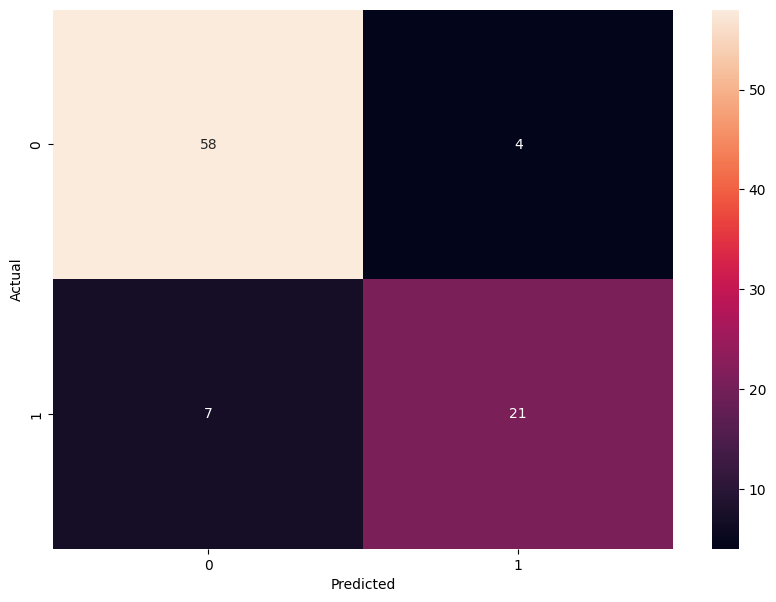

In [ ]:
cm_rf = confusion_matrix(y_test, y_test_rf)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm_rf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Random Forest Model**

Berdasarkan classification report, dapat diketahui nilai precision(**0.87**), dan f1-score accuracy(**0.88**) yang dihasilkan oleh model. Dari hasil visualisasi menggunakan heatmap confusion matrix dapat disimpulkan bahwa:
1. True Negative (TN): Model memprediksi **58** orang pasien belum meninggal dan memang kenyataannya, pasien itu belum meninggal.
2. True Positive (TP): Model memprediksi **21** orang pasien sudah meninggal dan memang kenyataannya, pasien itu sudah meninggal.
3. False Negative (FN): Model memprediksi **7** orang pasien belum meninggal, padahal pasien sudah meninggal.
4. False Positive (FP): Model memprediksi **4** orang pasien sudah meninggal, padahal pasien belum meninggal.


In [ ]:
print('Metrics untuk Model AdaBoost adalah : ')
print(classification_report(y_test, y_test_ada))

Metrics untuk Model AdaBoost adalah : 
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        62
           1       0.75      0.64      0.69        28

    accuracy                           0.82        90
   macro avg       0.80      0.77      0.78        90
weighted avg       0.82      0.82      0.82        90



Text(95.72222222222221, 0.5, 'Actual')

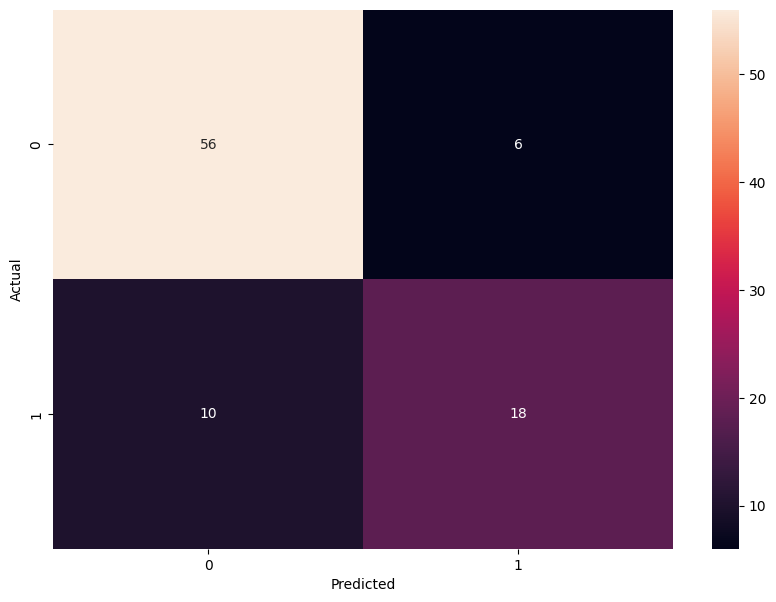

In [ ]:
cm_ada = confusion_matrix(y_test, y_test_ada)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm_ada, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Ada Boost Model**

Berdasarkan classification report, dapat diketahui nilai precision(**0.80**), dan f1-score accuracy(**0.82**) yang dihasilkan oleh model. Dari hasil visualisasi menggunakan heatmap confusion matrix dapat disimpulkan bahwa:
1. True Negative (TN): Model memprediksi **56** orang pasien belum meninggal dan memang kenyataannya, pasien itu belum meninggal.
2. True Positive (TP): Model memprediksi **18** orang pasien sudah meninggal dan memang kenyataannya, pasien itu sudah meninggal.
3. False Negative (FN): Model memprediksi **10** orang pasien belum meninggal, padahal pasien sudah meninggal.
4. False Positive (FP): Model memprediksi **6** orang pasien sudah meninggal, padahal pasien belum meninggal.


In [ ]:
print('Metrics untuk Model Voting Classifier adalah : ')
print(classification_report(y_test, y_test_vt))

Metrics untuk Model Voting Classifier adalah : 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        62
           1       0.80      0.57      0.67        28

    accuracy                           0.82        90
   macro avg       0.81      0.75      0.77        90
weighted avg       0.82      0.82      0.81        90



Text(95.72222222222221, 0.5, 'Actual')

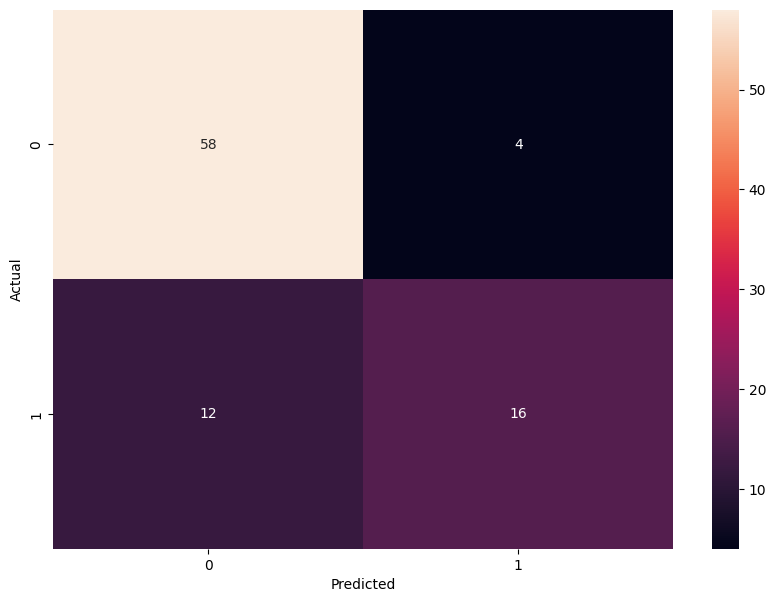

In [ ]:
cm_vt = confusion_matrix(y_test, y_test_vt)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm_vt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Ensembled Model (Logistic Regression, SVC, dan Decision Tree)**

Berdasarkan classification report, dapat diketahui nilai precision(**0.85**), dan f1-score accuracy(**0.84**) yang dihasilkan oleh model. Dari hasil visualisasi menggunakan heatmap confusion matrix dapat disimpulkan bahwa:
1. True Negative (TN): Model memprediksi **59** orang pasien belum meninggal dan memang kenyataannya, pasien itu belum meninggal.
2. True Positive (TP): Model memprediksi **17** orang pasien sudah meninggal dan memang kenyataannya, pasien itu sudah meninggal.
3. False Negative (FN): Model memprediksi **11** orang pasien belum meninggal, padahal pasien sudah meninggal.
4. False Positive (FP): Model memprediksi **3** orang pasien sudah meninggal, padahal pasien belum meninggal.


**Penentuan Model yang Digunakan**

Berdasarkan ketiga model yang telah dilakukan evaluasi, **Random Forest** yang memiliki  nilai precision dan f1-score accuracy tertinggi diantara model lainnya. Untuk itu, model tersebutlah yang akan dipakai dalam melakukan prediksi


---
##**Model Inference**
---

In [ ]:
X_train.head()

,time,serum_creatinine,ejection_fraction,age,serum_sodium,high_blood_pressure,anaemia,creatinine_phosphokinase
17,14,0.80,14,45,127,0,0,582
157,120,1.00,25,50,136,0,0,250
92,82,1.18,60,42,137,0,0,582
142,109,0.90,30,50,132,0,0,482
218,197,1.10,35,68,134,0,1,1021


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 17 to 176
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      209 non-null    int64  
 1   serum_creatinine          209 non-null    float64
 2   ejection_fraction         209 non-null    int64  
 3   age                       209 non-null    int64  
 4   serum_sodium              209 non-null    int64  
 5   high_blood_pressure       209 non-null    int64  
 6   anaemia                   209 non-null    int64  
 7   creatinine_phosphokinase  209 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 14.7 KB


In [ ]:
time = int(input("Time : "))
serumCreatinine = float(input("Serum Creatinine : "))
ejectionFraction = int(input("Ejection Fraction : "))
age = int(input("Age : "))
serumSodium = int(input("Serum Sodium : "))
highBloodPressure = int(input("High Blood Pressure (T=1 F=0): "))
anaemia = int(input("Anaemia (T=1 F=0): "))
creatininePhosphokinase = int(input("Creatinine Phosphokinase : "))

userData = [time, serumCreatinine, ejectionFraction, age, serumSodium, highBloodPressure, anaemia, creatininePhosphokinase]

predictRF = rf.predict([userData])

if predictRF == 1 :
  print("Prediksi : Pasien Meninggal")
else :
  print("Prediksi : Pasien Belum Meninggal")

Time : 98
Serum Creatinine : 0.9
Ejection Fraction : 17
Age : 52
Serum Sodium : 121
High Blood Pressure (T=1 F=0): 1
Anaemia (T=1 F=0): 1
Creatinine Phosphokinase : 487
Prediksi : Pasien Meninggal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


---
##**Kesimpulan**
---

1. Pada Dataset yang digunakan terdapat 13 atribut yang diperkirakan sebagai faktor yang memprediksi keselamatan pasien dari penyakit jantung. Namun setelah dilakukan analisis kami menyimpulkan untuk mengambil beberapa atribut yang menjadi faktor kuat dalam memprediksi keselamatan pasien dari penyakit jantung yaitu time, serum_creatinine, ejection_fraction, age, serum_sodium, high_blood_pressure, anaemia, creatinine_phosphokinase serta atribut DEATH_EVENT sebagai target.
2. Dataset yang digunakan sudah tidak terdapat _missing value_ sehingga dapat langsung digunakan untuk analisis.
3. Random Forest memiliki nilai presisi yang lebih besar dibading model lainnya yaitu sebesar 0.87 dan f1-score _accuracy_ 0.88, sehingga model ini lebih baik dalam melakukan prediksi "death event" penyakit kardiovaskular dibandingkan dua model lainnya.
4. Pada percobaan _model inference_ dengan menggunakan model Random Forest dan kami memasukkan nila-nilai sebagai berikut, _Time_ 98, _Serum Creatinine_ 0.9, _Ejection Fraction_ 17, _Age_ 52, _Serum Sodium_ 121, _High Blood Pressure True_, _Anaemia True_, dan _Creatinine Phosphokinase_ 487, maka prediksi yang didapatkan adalah Pasien Meninggal.
5. Dari hasil akurasi dan uji coba Random Forest menjadi salah satu model yang diunakan dan dapat memberikan prediksi yang cukup baik.